**APPENDIX F**

In [ ]:
import seaborn as sns
import pandas as pd
import datetime 
import calendar
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics
 
 
# Load the dataset
dataset = pd.read_csv('/content/all_together - Copy.csv')
print(dataset.head())
print("\n")

   No  year  month  day  hour  PM10  ...  TEMP    PRES  DEWP  RAIN  WSPM  TARGET
0   1  2013      3    1     0   4.0  ...  -0.7  1023.0 -18.8   0.0   4.4       0
1   2  2013      3    1     1   8.0  ...  -1.1  1023.2 -18.2   0.0   4.7       0
2   3  2013      3    1     2   7.0  ...  -1.1  1023.5 -18.2   0.0   5.6       0
3   4  2013      3    1     3   6.0  ...  -1.4  1024.5 -19.4   0.0   3.1       0
4   5  2013      3    1     4   3.0  ...  -2.0  1025.2 -19.5   0.0   2.0       0

[5 rows x 16 columns]




In [ ]:
#Columns 1 and 2 
X = dataset.drop('TARGET',axis=1)
y = dataset[['TARGET']]

X = np.nan_to_num(X)
y = np.nan_to_num(y)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

In [ ]:
# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]


# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(linear_model.LogisticRegression(multi_class='ovr', solver='liblinear'))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)
y_pred = classifier.predict(X_test)

#fig, ax = plt.subplots(figsize=(10, 6))
#ax.set_title('Confusion Matrx')

print(metrics.confusion_matrix(y_pred.flatten(), y_test.flatten()))
#disp =metrics.plot_confusion_matrix(classifier, X_test.values.argmax(axis=1), y_test.values.argmax(axis=1), display_labels= dataset.TARGET, ax = ax)
#disp.confusion_matrix

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test.flatten(), y_pred.flatten())
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:")
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)


[[183538  27134]
 [ 26846  78058]]
Confusion Matrix:
[[183538  26846]
 [ 27134  78058]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85     27219
           1       0.64      0.67      0.65     52564
           2       0.86      0.77      0.81     25409

   micro avg       0.74      0.74      0.74    105192
   macro avg       0.79      0.77      0.77    105192
weighted avg       0.75      0.74      0.74    105192
 samples avg       0.66      0.74      0.69    105192

Accuracy: 0.5829340634268766


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


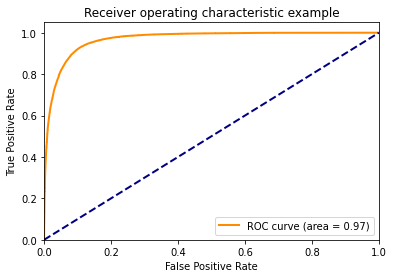

In [ ]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  import sys


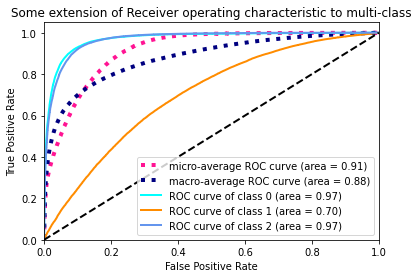

In [ ]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()


In [ ]:
y_prob = classifier.predict_proba(X_test)

macro_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo",
                                  average="macro")
weighted_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo",
                                     average="weighted")
macro_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr",
                                  average="macro")
weighted_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr",
                                     average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-One ROC AUC scores:
0.879070 (macro),
0.834188 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.879070 (macro),
0.834188 (weighted by prevalence)


In [ ]:
# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]


# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(linear_model.LogisticRegression(multi_class='auto', solver='liblinear'))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)
y_pred = classifier.predict(X_test)

#fig, ax = plt.subplots(figsize=(10, 6))
#ax.set_title('Confusion Matrx')

print(metrics.confusion_matrix(y_pred.flatten(), y_test.flatten()))
#disp =metrics.plot_confusion_matrix(classifier, X_test.values.argmax(axis=1), y_test.values.argmax(axis=1), display_labels= dataset.TARGET, ax = ax)
#disp.confusion_matrix

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test.flatten(), y_pred.flatten())
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:")
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)


import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix




[[183538  27134]
 [ 26846  78058]]
Confusion Matrix:
[[183538  26846]
 [ 27134  78058]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85     27219
           1       0.64      0.67      0.65     52564
           2       0.86      0.77      0.81     25409

   micro avg       0.74      0.74      0.74    105192
   macro avg       0.79      0.77      0.77    105192
weighted avg       0.75      0.74      0.74    105192
 samples avg       0.66      0.74      0.69    105192

Accuracy: 0.5829340634268766


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


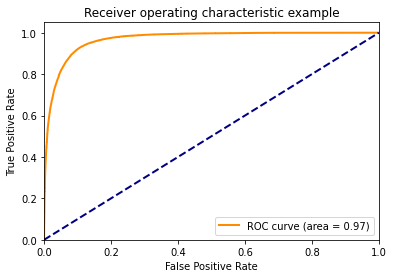

In [ ]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  import sys


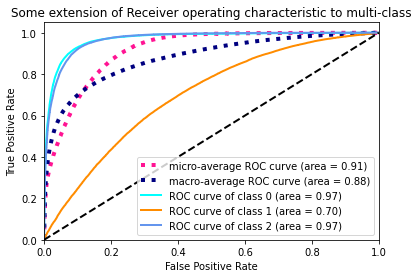

In [ ]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()


In [ ]:
y_prob = classifier.predict_proba(X_test)

macro_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo",
                                  average="macro")
weighted_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo",
                                     average="weighted")
macro_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr",
                                  average="macro")
weighted_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr",
                                     average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-One ROC AUC scores:
0.879070 (macro),
0.834188 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.879070 (macro),
0.834188 (weighted by prevalence)


In [ ]:
y_pred = classifier.predict(X_test)
 
# Model accuracy
print("\n")
print("Normal Predictor Values ===============================")
print("model score: %.3f" % classifier.score(X_test, y_test))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, average='weighted'))
print("Recall:",metrics.recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:",metrics.f1_score(y_test, y_pred, average='weighted'))
print("\n")



Normal Predictor Values ===============================
model score: 0.583
Accuracy: 0.5829340634268766
Precision: 0.749357174753402
Recall: 0.7420526275762416
F1 Score: 0.7449650476395899




In [ ]:
# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]


# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(linear_model.LogisticRegression(multi_class='multinomial', solver='lbfgs'))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


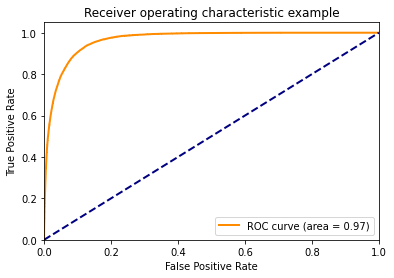

In [ ]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  import sys


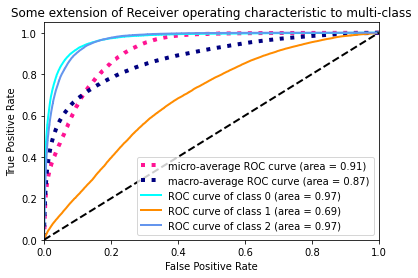

In [ ]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()


In [ ]:
y_prob = classifier.predict_proba(X_test)

macro_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo",
                                  average="macro")
weighted_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo",
                                     average="weighted")
macro_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr",
                                  average="macro")
weighted_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr",
                                     average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-One ROC AUC scores:
0.873380 (macro),
0.826605 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.873380 (macro),
0.826605 (weighted by prevalence)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]


# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(KNeighborsClassifier())
y_score = classifier.fit(X_train, y_train)
y_score

OneVsRestClassifier(estimator=KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                   metric_params=None,
                                                   n_jobs=None, n_neighbors=5,
                                                   p=2, weights='uniform'),
                    n_jobs=None)

In [ ]:
y_pred = classifier.predict(X_test)
 
# Model accuracy
print("\n")
print("Normal Predictor Values ===============================")
print("model score: %.3f" % classifier.score(X_test, y_test))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, average='weighted'))
print("Recall:",metrics.recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:",metrics.f1_score(y_test, y_pred, average='weighted'))
print("\n")
 



Normal Predictor Values ===============================
model score: 0.896
Accuracy: 0.8963704464217811
Precision: 0.896857527630289
Recall: 0.8963704464217811
F1 Score: 0.8966130608765369




In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]


# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = KNeighborsClassifier(algorithm='auto')
y_score = classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

#fig, ax = plt.subplots(figsize=(10, 6))
#ax.set_title('Confusion Matrx')

print(metrics.confusion_matrix(y_pred.flatten(), y_test.flatten()))
#disp =metrics.plot_confusion_matrix(classifier, X_test.values.argmax(axis=1), y_test.values.argmax(axis=1), display_labels= dataset.TARGET, ax = ax)
#disp.confusion_matrix

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test.flatten(), y_pred.flatten())
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:")
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)


[[199540  10901]
 [ 10844  94291]]
Confusion Matrix:
[[199540  10844]
 [ 10901  94291]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90     27219
           1       0.90      0.90      0.90     52564
           2       0.90      0.89      0.90     25409

   micro avg       0.90      0.90      0.90    105192
   macro avg       0.90      0.90      0.90    105192
weighted avg       0.90      0.90      0.90    105192
 samples avg       0.90      0.90      0.90    105192

Accuracy: 0.8963704464217811


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
y_pred = classifier.predict(X_test)
 
# Model accuracy
print("\n")
print("Normal Predictor Values ===============================")
print("model score: %.3f" % classifier.score(X_test, y_test))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, average='weighted'))
print("Recall:",metrics.recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:",metrics.f1_score(y_test, y_pred, average='weighted'))
print("\n")
 



Normal Predictor Values ===============================
model score: 0.896
Accuracy: 0.8963704464217811
Precision: 0.896857527630289
Recall: 0.8963704464217811
F1 Score: 0.8966130608765369




In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]


# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = KNeighborsClassifier(algorithm='ball_tree')
y_score = classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

#fig, ax = plt.subplots(figsize=(10, 6))
#ax.set_title('Confusion Matrx')

print(metrics.confusion_matrix(y_pred.flatten(), y_test.flatten()))
#disp =metrics.plot_confusion_matrix(classifier, X_test.values.argmax(axis=1), y_test.values.argmax(axis=1), display_labels= dataset.TARGET, ax = ax)
#disp.confusion_matrix

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test.flatten(), y_pred.flatten())
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:")
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)


[[199540  10901]
 [ 10844  94291]]
Confusion Matrix:
[[199540  10844]
 [ 10901  94291]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90     27219
           1       0.90      0.90      0.90     52564
           2       0.90      0.89      0.90     25409

   micro avg       0.90      0.90      0.90    105192
   macro avg       0.90      0.90      0.90    105192
weighted avg       0.90      0.90      0.90    105192
 samples avg       0.90      0.90      0.90    105192

Accuracy: 0.8963704464217811


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
y_pred = classifier.predict(X_test)
 
# Model accuracy
print("\n")
print("Normal Predictor Values ===============================")
print("model score: %.3f" % classifier.score(X_test, y_test))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, average='weighted'))
print("Recall:",metrics.recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:",metrics.f1_score(y_test, y_pred, average='weighted'))
print("\n")
 



Normal Predictor Values ===============================
model score: 0.896
Accuracy: 0.8963704464217811
Precision: 0.896857527630289
Recall: 0.8963704464217811
F1 Score: 0.8966130608765369




In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]


# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = KNeighborsClassifier(algorithm='kd_tree')
y_score = classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

#fig, ax = plt.subplots(figsize=(10, 6))
#ax.set_title('Confusion Matrx')

print(metrics.confusion_matrix(y_pred.flatten(), y_test.flatten()))
#disp =metrics.plot_confusion_matrix(classifier, X_test.values.argmax(axis=1), y_test.values.argmax(axis=1), display_labels= dataset.TARGET, ax = ax)
#disp.confusion_matrix

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test.flatten(), y_pred.flatten())
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:")
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)


[[199540  10901]
 [ 10844  94291]]
Confusion Matrix:
[[199540  10844]
 [ 10901  94291]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90     27219
           1       0.90      0.90      0.90     52564
           2       0.90      0.89      0.90     25409

   micro avg       0.90      0.90      0.90    105192
   macro avg       0.90      0.90      0.90    105192
weighted avg       0.90      0.90      0.90    105192
 samples avg       0.90      0.90      0.90    105192

Accuracy: 0.8963704464217811


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
y_pred = classifier.predict(X_test)
 
# Model accuracy
print("\n")
print("Normal Predictor Values ===============================")
print("model score: %.3f" % classifier.score(X_test, y_test))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, average='weighted'))
print("Recall:",metrics.recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:",metrics.f1_score(y_test, y_pred, average='weighted'))
print("\n")
 



Normal Predictor Values ===============================
model score: 0.896
Accuracy: 0.8963704464217811
Precision: 0.896857527630289
Recall: 0.8963704464217811
F1 Score: 0.8966130608765369




In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]


# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = KNeighborsClassifier(algorithm='brute')
y_score = classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

#fig, ax = plt.subplots(figsize=(10, 6))
#ax.set_title('Confusion Matrx')

print(metrics.confusion_matrix(y_pred.flatten(), y_test.flatten()))
#disp =metrics.plot_confusion_matrix(classifier, X_test.values.argmax(axis=1), y_test.values.argmax(axis=1), display_labels= dataset.TARGET, ax = ax)
#disp.confusion_matrix

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test.flatten(), y_pred.flatten())
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:")
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)


[[199540  10901]
 [ 10844  94291]]
Confusion Matrix:
[[199540  10844]
 [ 10901  94291]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90     27219
           1       0.90      0.90      0.90     52564
           2       0.90      0.89      0.90     25409

   micro avg       0.90      0.90      0.90    105192
   macro avg       0.90      0.90      0.90    105192
weighted avg       0.90      0.90      0.90    105192
 samples avg       0.90      0.90      0.90    105192

Accuracy: 0.8963704464217811


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
y_pred = classifier.predict(X_test)
 
# Model accuracy
print("\n")
print("Normal Predictor Values ===============================")
print("model score: %.3f" % classifier.score(X_test, y_test))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, average='weighted'))
print("Recall:",metrics.recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:",metrics.f1_score(y_test, y_pred, average='weighted'))
print("\n")
 



Normal Predictor Values ===============================
model score: 0.896
Accuracy: 0.8963704464217811
Precision: 0.896857527630289
Recall: 0.8963704464217811
F1 Score: 0.8966130608765369




In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]


# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
y_score = classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

#fig, ax = plt.subplots(figsize=(10, 6))
#ax.set_title('Confusion Matrx')

print(metrics.confusion_matrix(y_pred.flatten(), y_test.flatten()))
#disp =metrics.plot_confusion_matrix(classifier, X_test.values.argmax(axis=1), y_test.values.argmax(axis=1), display_labels= dataset.TARGET, ax = ax)
#disp.confusion_matrix

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test.flatten(), y_pred.flatten())
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:")
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)


[[191736  18648]
 [ 18648  86544]]
Confusion Matrix:
[[191736  18648]
 [ 18648  86544]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.90      0.83     27219
           1       0.87      0.76      0.81     52564
           2       0.80      0.87      0.84     25409

   micro avg       0.82      0.82      0.82    105192
   macro avg       0.81      0.84      0.83    105192
weighted avg       0.83      0.82      0.82    105192
 samples avg       0.82      0.82      0.82    105192

Accuracy: 0.8227241615331964


In [ ]:
y_pred = classifier.predict(X_test)
 
# Model accuracy
print("\n")
print("Normal Predictor Values ===============================")
print("model score: %.3f" % classifier.score(X_test, y_test))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, average='weighted'))
print("Recall:",metrics.recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:",metrics.f1_score(y_test, y_pred, average='weighted'))
print("\n")
 



Normal Predictor Values ===============================
model score: 0.823
Accuracy: 0.8227241615331964
Precision: 0.828238121524114
Recall: 0.8227241615331964
F1 Score: 0.8220945348920023




In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]


# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
y_score = classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

#fig, ax = plt.subplots(figsize=(10, 6))
#ax.set_title('Confusion Matrx')

print(metrics.confusion_matrix(y_pred.flatten(), y_test.flatten()))
#disp =metrics.plot_confusion_matrix(classifier, X_test.values.argmax(axis=1), y_test.values.argmax(axis=1), display_labels= dataset.TARGET, ax = ax)
#disp.confusion_matrix

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test.flatten(), y_pred.flatten())
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:")
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)


[[191736  18648]
 [ 18648  86544]]
Confusion Matrix:
[[191736  18648]
 [ 18648  86544]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.90      0.83     27219
           1       0.87      0.76      0.81     52564
           2       0.80      0.87      0.84     25409

   micro avg       0.82      0.82      0.82    105192
   macro avg       0.81      0.84      0.83    105192
weighted avg       0.83      0.82      0.82    105192
 samples avg       0.82      0.82      0.82    105192

Accuracy: 0.8227241615331964


In [ ]:
y_pred = classifier.predict(X_test)
 
# Model accuracy
print("\n")
print("Normal Predictor Values ===============================")
print("model score: %.3f" % classifier.score(X_test, y_test))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, average='weighted'))
print("Recall:",metrics.recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:",metrics.f1_score(y_test, y_pred, average='weighted'))
print("\n")
 



Normal Predictor Values ===============================
model score: 0.823
Accuracy: 0.8227241615331964
Precision: 0.828238121524114
Recall: 0.8227241615331964
F1 Score: 0.8220945348920023




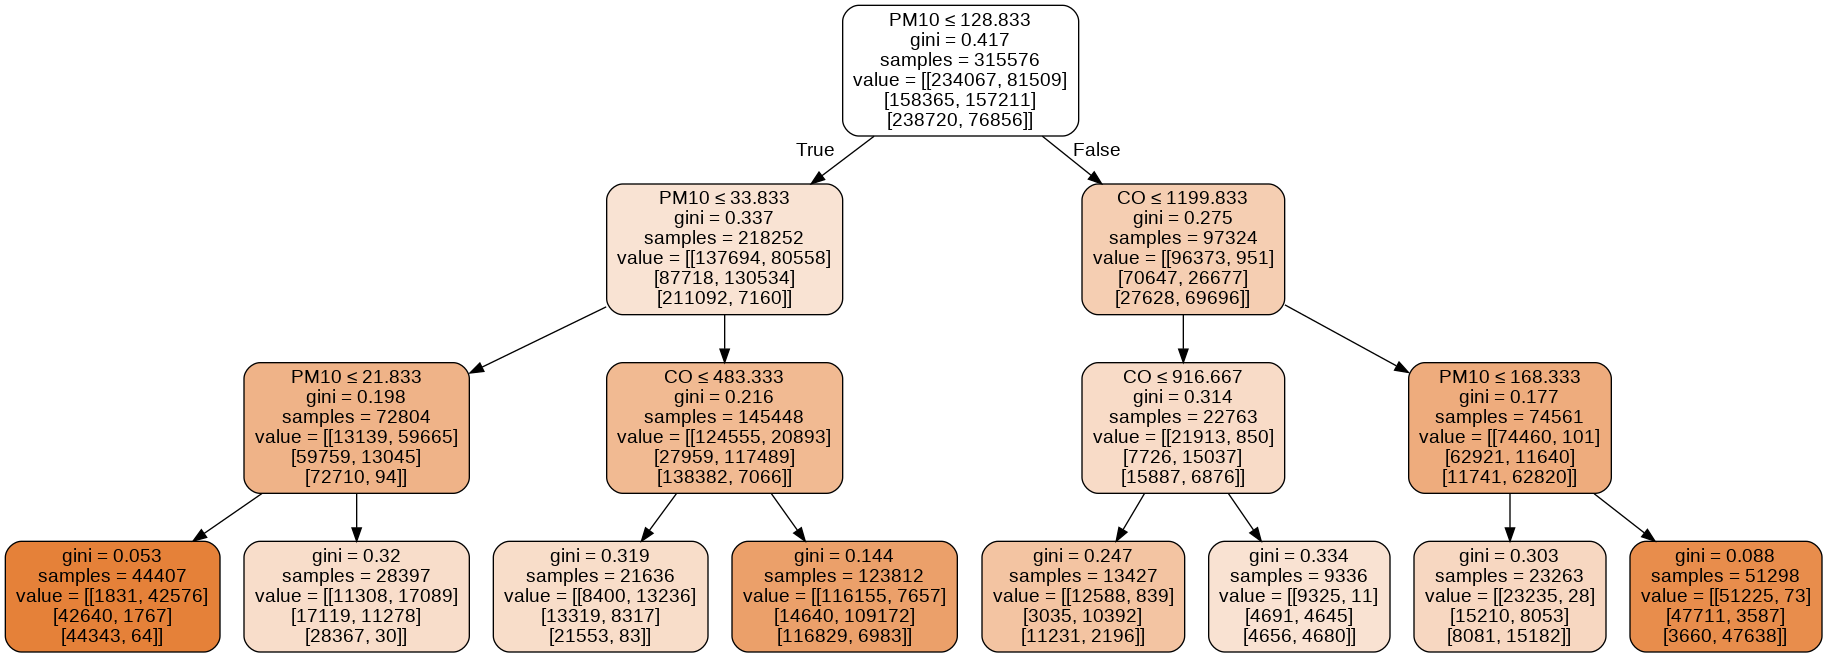

In [ ]:
#visualizing the tree
import io
from io import StringIO
from sklearn.tree import export_graphviz
# from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz
xvar = dataset.drop('TARGET', axis=1)
feature_cols = xvar.columns
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1','2'])
from pydot import graph_from_dot_data
(graph, ) = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]


# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
y_score = classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

#fig, ax = plt.subplots(figsize=(10, 6))
#ax.set_title('Confusion Matrx')

print(metrics.confusion_matrix(y_pred.flatten(), y_test.flatten()))
#disp =metrics.plot_confusion_matrix(classifier, X_test.values.argmax(axis=1), y_test.values.argmax(axis=1), display_labels= dataset.TARGET, ax = ax)
#disp.confusion_matrix

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test.flatten(), y_pred.flatten())
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:")
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)


[[189688  20696]
 [ 20696  84496]]
Confusion Matrix:
[[189688  20696]
 [ 20696  84496]]
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.93      0.82     27219
           1       0.88      0.71      0.78     52564
           2       0.79      0.86      0.82     25409

   micro avg       0.80      0.80      0.80    105192
   macro avg       0.80      0.83      0.81    105192
weighted avg       0.82      0.80      0.80    105192
 samples avg       0.80      0.80      0.80    105192

Accuracy: 0.8032550003802571


In [ ]:
y_pred = classifier.predict(X_test)
 
# Model accuracy
print("\n")
print("Normal Predictor Values ===============================")
print("model score: %.3f" % classifier.score(X_test, y_test))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, average='weighted'))
print("Recall:",metrics.recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:",metrics.f1_score(y_test, y_pred, average='weighted'))
print("\n")
 



Normal Predictor Values ===============================
model score: 0.803
Accuracy: 0.8032550003802571
Precision: 0.8163556415968549
Recall: 0.8032550003802571
F1 Score: 0.8015814076614007




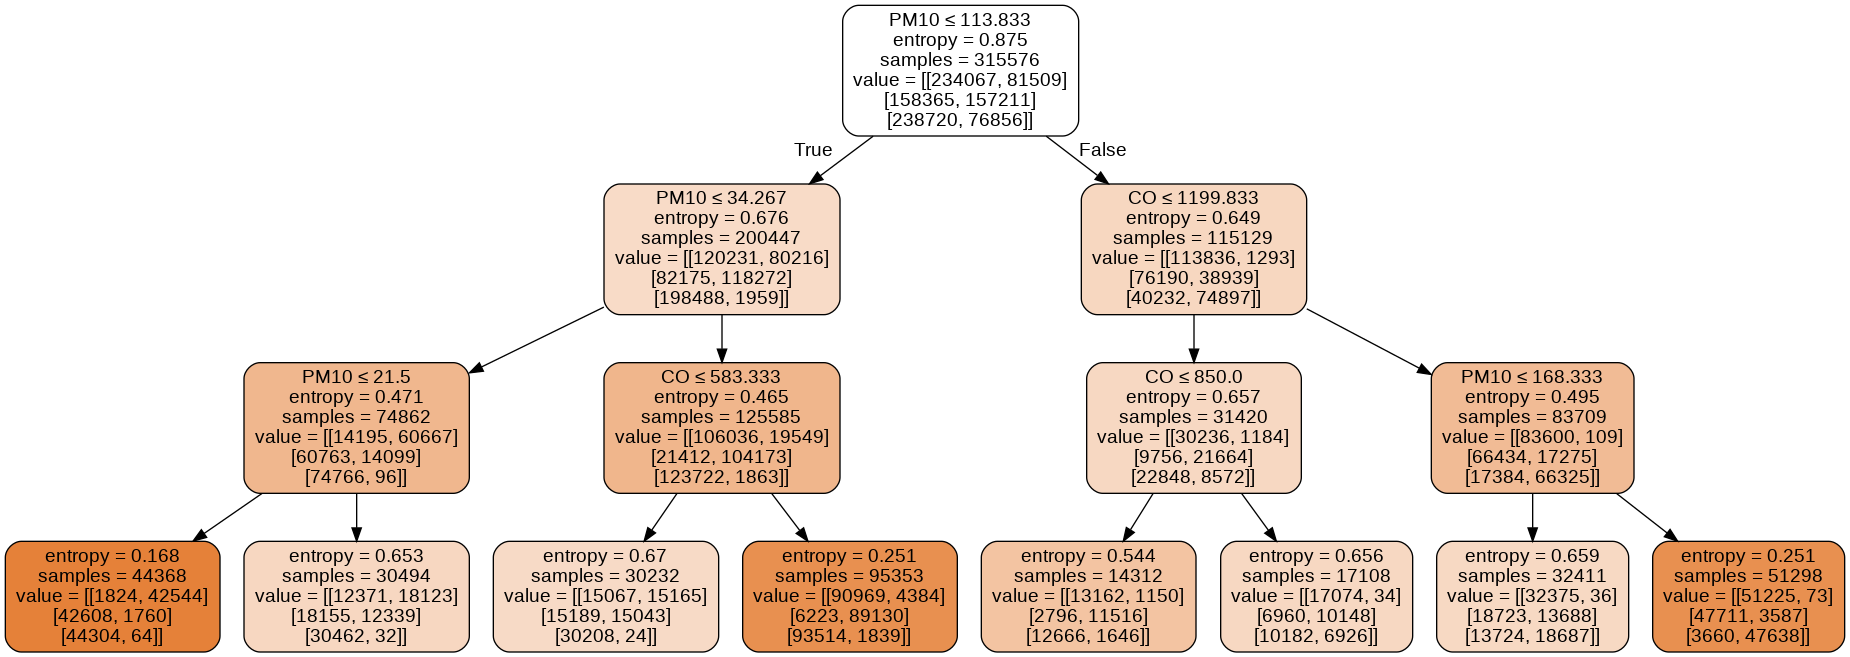

In [ ]:
#visualizing the tree
import io
from io import StringIO
from sklearn.tree import export_graphviz
# from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz
xvar = dataset.drop('TARGET', axis=1)
feature_cols = xvar.columns
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1','2'])
from pydot import graph_from_dot_data
(graph, ) = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]


# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = RandomForestClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
y_score = classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

#fig, ax = plt.subplots(figsize=(10, 6))
#ax.set_title('Confusion Matrx')

print(metrics.confusion_matrix(y_pred.flatten(), y_test.flatten()))
#disp =metrics.plot_confusion_matrix(classifier, X_test.values.argmax(axis=1), y_test.values.argmax(axis=1), display_labels= dataset.TARGET, ax = ax)
#disp.confusion_matrix

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test.flatten(), y_pred.flatten())
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:")
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)


[[195317  25882]
 [ 15067  79310]]
Confusion Matrix:
[[195317  15067]
 [ 25882  79310]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.66      0.77     27219
           1       0.80      0.86      0.83     52564
           2       0.89      0.62      0.73     25409

   micro avg       0.84      0.75      0.79    105192
   macro avg       0.87      0.72      0.78    105192
weighted avg       0.85      0.75      0.79    105192
 samples avg       0.75      0.75      0.75    105192

Accuracy: 0.7539546733591909


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
y_pred = classifier.predict(X_test)
 
# Model accuracy
print("\n")
print("Normal Predictor Values ===============================")
print("model score: %.3f" % classifier.score(X_test, y_test))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, average='weighted'))
print("Recall:",metrics.recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:",metrics.f1_score(y_test, y_pred, average='weighted'))
print("\n")
 



Normal Predictor Values ===============================
model score: 0.754
Accuracy: 0.7539546733591909
Precision: 0.8512185119795482
Recall: 0.7539546733591909
F1 Score: 0.7910046119301658




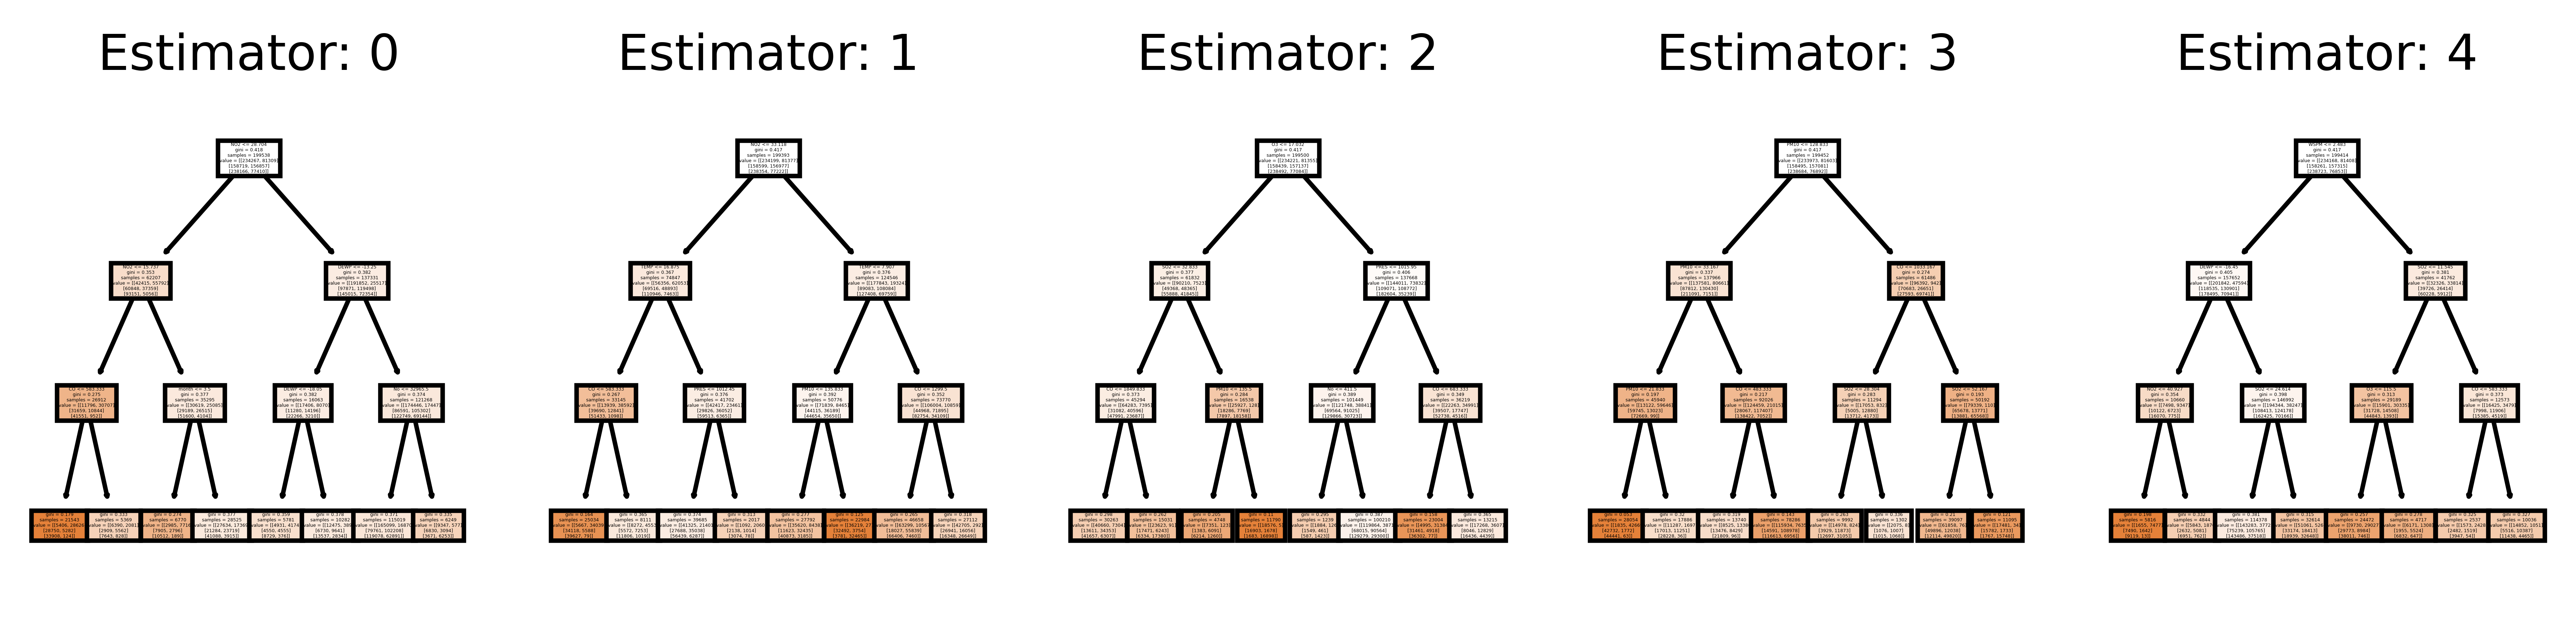

In [ ]:
from sklearn import tree
# This may not the best way to view each estimator as it is small
#fn=data.feature_names
#cn=data.target_names
fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=900)
for index in range(0, 5):
    tree.plot_tree(classifier.estimators_[index],
                   feature_names = feature_cols, 
                   class_names=['0','1','2'],
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
fig.savefig('rf_5trees.png')

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]


# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = RandomForestClassifier(criterion = "entropy", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
y_score = classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

#fig, ax = plt.subplots(figsize=(10, 6))
#ax.set_title('Confusion Matrx')

print(metrics.confusion_matrix(y_pred.flatten(), y_test.flatten()))
#disp =metrics.plot_confusion_matrix(classifier, X_test.values.argmax(axis=1), y_test.values.argmax(axis=1), display_labels= dataset.TARGET, ax = ax)
#disp.confusion_matrix

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test.flatten(), y_pred.flatten())
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:")
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)


[[195174  24993]
 [ 15210  80199]]
Confusion Matrix:
[[195174  15210]
 [ 24993  80199]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.69      0.79     27219
           1       0.80      0.86      0.83     52564
           2       0.88      0.64      0.74     25409

   micro avg       0.84      0.76      0.80    105192
   macro avg       0.87      0.73      0.79    105192
weighted avg       0.85      0.76      0.80    105192
 samples avg       0.76      0.76      0.76    105192

Accuracy: 0.7624058863791924


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
y_pred = classifier.predict(X_test)
 
# Model accuracy
print("\n")
print("Normal Predictor Values ===============================")
print("model score: %.3f" % classifier.score(X_test, y_test))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, average='weighted'))
print("Recall:",metrics.recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:",metrics.f1_score(y_test, y_pred, average='weighted'))
print("\n")
 



Normal Predictor Values ===============================
model score: 0.762
Accuracy: 0.7624058863791924
Precision: 0.8501348614679947
Recall: 0.7624058863791924
F1 Score: 0.7965755681869129




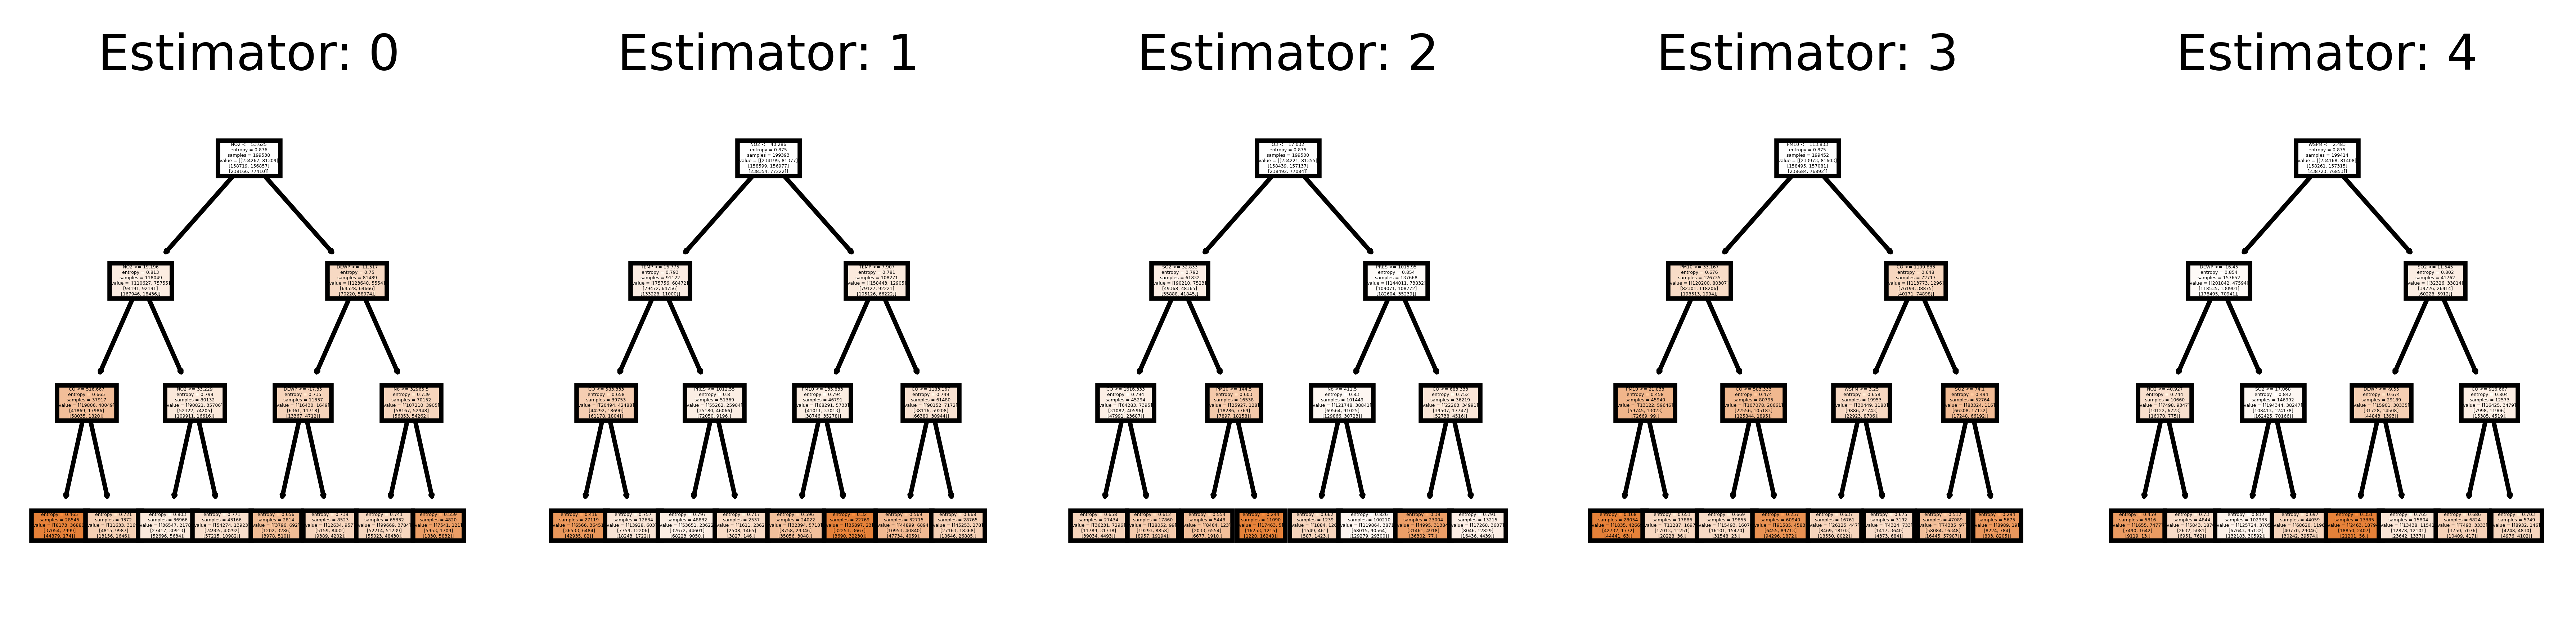

In [ ]:
from sklearn import tree
# This may not the best way to view each estimator as it is small
#fn=data.feature_names
#cn=data.target_names
fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=900)
for index in range(0, 5):
    tree.plot_tree(classifier.estimators_[index],
                   feature_names = feature_cols, 
                   class_names=['0','1','2'],
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
fig.savefig('rf_5trees.png')

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]


# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(AdaBoostClassifier(n_estimators=100, random_state=0))
y_score = classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

#fig, ax = plt.subplots(figsize=(10, 6))
#ax.set_title('Confusion Matrx')

print(metrics.confusion_matrix(y_pred.flatten(), y_test.flatten()))
#disp =metrics.plot_confusion_matrix(classifier, X_test.values.argmax(axis=1), y_test.values.argmax(axis=1), display_labels= dataset.TARGET, ax = ax)
#disp.confusion_matrix

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test.flatten(), y_pred.flatten())
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:")
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)


[[193723  15008]
 [ 16661  90184]]
Confusion Matrix:
[[193723  16661]
 [ 15008  90184]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.87     27219
           1       0.82      0.85      0.84     52564
           2       0.85      0.86      0.86     25409

   micro avg       0.84      0.86      0.85    105192
   macro avg       0.85      0.86      0.86    105192
weighted avg       0.84      0.86      0.85    105192
 samples avg       0.83      0.86      0.84    105192

Accuracy: 0.7997186097802115


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
y_pred = classifier.predict(X_test)
 
# Model accuracy
print("\n")
print("Normal Predictor Values ===============================")
print("model score: %.3f" % classifier.score(X_test, y_test))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, average='weighted'))
print("Recall:",metrics.recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:",metrics.f1_score(y_test, y_pred, average='weighted'))
print("\n")
 



Normal Predictor Values ===============================
model score: 0.800
Accuracy: 0.7997186097802115
Precision: 0.8449284459136823
Recall: 0.8573275534261161
F1 Score: 0.8508760926384619




In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]


# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(AdaBoostClassifier(n_estimators=50, random_state=0))
y_score = classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

#fig, ax = plt.subplots(figsize=(10, 6))
#ax.set_title('Confusion Matrx')

print(metrics.confusion_matrix(y_pred.flatten(), y_test.flatten()))
#disp =metrics.plot_confusion_matrix(classifier, X_test.values.argmax(axis=1), y_test.values.argmax(axis=1), display_labels= dataset.TARGET, ax = ax)
#disp.confusion_matrix

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test.flatten(), y_pred.flatten())
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:")
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)


[[192899  15216]
 [ 17485  89976]]
Confusion Matrix:
[[192899  17485]
 [ 15216  89976]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.85      0.87     27219
           1       0.81      0.85      0.83     52564
           2       0.84      0.86      0.85     25409

   micro avg       0.84      0.86      0.85    105192
   macro avg       0.85      0.86      0.85    105192
weighted avg       0.84      0.86      0.85    105192
 samples avg       0.82      0.86      0.83    105192

Accuracy: 0.7907540497376226


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
y_pred = classifier.predict(X_test)
 
# Model accuracy
print("\n")
print("Normal Predictor Values ===============================")
print("model score: %.3f" % classifier.score(X_test, y_test))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, average='weighted'))
print("Recall:",metrics.recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:",metrics.f1_score(y_test, y_pred, average='weighted'))
print("\n")
 



Normal Predictor Values ===============================
model score: 0.791
Accuracy: 0.7907540497376226
Precision: 0.838208399782755
Recall: 0.8553502167465207
F1 Score: 0.8464520827654517




In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]


# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(GradientBoostingClassifier(n_estimators=100, random_state=0))
y_score = classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

#fig, ax = plt.subplots(figsize=(10, 6))
#ax.set_title('Confusion Matrx')

print(metrics.confusion_matrix(y_pred.flatten(), y_test.flatten()))
#disp =metrics.plot_confusion_matrix(classifier, X_test.values.argmax(axis=1), y_test.values.argmax(axis=1), display_labels= dataset.TARGET, ax = ax)
#disp.confusion_matrix

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test.flatten(), y_pred.flatten())
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:")
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)


[[196190  13135]
 [ 14194  92057]]
Confusion Matrix:
[[196190  14194]
 [ 13135  92057]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88     27219
           1       0.86      0.88      0.87     52564
           2       0.86      0.87      0.87     25409

   micro avg       0.87      0.88      0.87    105192
   macro avg       0.87      0.87      0.87    105192
weighted avg       0.87      0.88      0.87    105192
 samples avg       0.86      0.88      0.87    105192

Accuracy: 0.8518613582781961


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
y_pred = classifier.predict(X_test)
 
# Model accuracy
print("\n")
print("Normal Predictor Values ===============================")
print("model score: %.3f" % classifier.score(X_test, y_test))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, average='weighted'))
print("Recall:",metrics.recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:",metrics.f1_score(y_test, y_pred, average='weighted'))
print("\n")
 



Normal Predictor Values ===============================
model score: 0.852
Accuracy: 0.8518613582781961
Precision: 0.8666750967285995
Recall: 0.8751330899688189
F1 Score: 0.8708030840993459




In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]


# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(GradientBoostingClassifier(n_estimators=50, random_state=0))
y_score = classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

#fig, ax = plt.subplots(figsize=(10, 6))
#ax.set_title('Confusion Matrx')

print(metrics.confusion_matrix(y_pred.flatten(), y_test.flatten()))
#disp =metrics.plot_confusion_matrix(classifier, X_test.values.argmax(axis=1), y_test.values.argmax(axis=1), display_labels= dataset.TARGET, ax = ax)
#disp.confusion_matrix

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test.flatten(), y_pred.flatten())
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:")
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)


[[195007  14161]
 [ 15377  91031]]
Confusion Matrix:
[[195007  15377]
 [ 14161  91031]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87     27219
           1       0.84      0.87      0.86     52564
           2       0.85      0.86      0.86     25409

   micro avg       0.86      0.87      0.86    105192
   macro avg       0.86      0.86      0.86    105192
weighted avg       0.86      0.87      0.86    105192
 samples avg       0.85      0.87      0.86    105192

Accuracy: 0.8412046543463382


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
y_pred = classifier.predict(X_test)
 
# Model accuracy
print("\n")
print("Normal Predictor Values ===============================")
print("model score: %.3f" % classifier.score(X_test, y_test))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, average='weighted'))
print("Recall:",metrics.recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:",metrics.f1_score(y_test, y_pred, average='weighted'))
print("\n")
 



Normal Predictor Values ===============================
model score: 0.841
Accuracy: 0.8412046543463382
Precision: 0.8558327937362581
Recall: 0.8653794965396608
F1 Score: 0.8604585428033211




In [ ]:
from sklearn import svm

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]


# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(decision_function_shape='ovo'))
y_score = classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

#fig, ax = plt.subplots(figsize=(10, 6))
#ax.set_title('Confusion Matrx')

print(metrics.confusion_matrix(y_pred.flatten(), y_test.flatten()))
#disp =metrics.plot_confusion_matrix(classifier, X_test.values.argmax(axis=1), y_test.values.argmax(axis=1), display_labels= dataset.TARGET, ax = ax)
#disp.confusion_matrix

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test.flatten(), y_pred.flatten())
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:")
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)


In [ ]:
y_pred = classifier.predict(X_test)
 
# Model accuracy
print("\n")
print("Normal Predictor Values ===============================")
print("model score: %.3f" % classifier.score(X_test, y_test))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, average='weighted'))
print("Recall:",metrics.recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:",metrics.f1_score(y_test, y_pred, average='weighted'))
print("\n")
 

In [ ]:
from sklearn import svm

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]


# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.LinearSVC())
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

y_pred = classifier.predict(X_test)

#fig, ax = plt.subplots(figsize=(10, 6))
#ax.set_title('Confusion Matrx')

print(metrics.confusion_matrix(y_pred.flatten(), y_test.flatten()))
#disp =metrics.plot_confusion_matrix(classifier, X_test.values.argmax(axis=1), y_test.values.argmax(axis=1), display_labels= dataset.TARGET, ax = ax)
#disp.confusion_matrix

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test.flatten(), y_pred.flatten())
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:")
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)


In [ ]:
y_pred = classifier.predict(X_test)
 
# Model accuracy
print("\n")
print("Normal Predictor Values ===============================")
print("model score: %.3f" % classifier.score(X_test, y_test))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, average='weighted'))
print("Recall:",metrics.recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:",metrics.f1_score(y_test, y_pred, average='weighted'))
print("\n")
 

In [ ]:
from sklearn import svm

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]


# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.LinearSVC())
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

y_pred = classifier.predict(X_test)

#fig, ax = plt.subplots(figsize=(10, 6))
#ax.set_title('Confusion Matrx')

print(metrics.confusion_matrix(y_pred.flatten(), y_test.flatten()))
#disp =metrics.plot_confusion_matrix(classifier, X_test.values.argmax(axis=1), y_test.values.argmax(axis=1), display_labels= dataset.TARGET, ax = ax)
#disp.confusion_matrix

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test.flatten(), y_pred.flatten())
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:")
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)


In [ ]:
y_pred = classifier.predict(X_test)
 
# Model accuracy
print("\n")
print("Normal Predictor Values ===============================")
print("model score: %.3f" % classifier.score(X_test, y_test))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, average='weighted'))
print("Recall:",metrics.recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:",metrics.f1_score(y_test, y_pred, average='weighted'))
print("\n")
 

In [ ]:
from sklearn.neural_network import MLPClassifier

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]


# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(MLPClassifier(solver="sgd"))
y_score = classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

#fig, ax = plt.subplots(figsize=(10, 6))
#ax.set_title('Confusion Matrx')

print(metrics.confusion_matrix(y_pred.flatten(), y_test.flatten()))
#disp =metrics.plot_confusion_matrix(classifier, X_test.values.argmax(axis=1), y_test.values.argmax(axis=1), display_labels= dataset.TARGET, ax = ax)
#disp.confusion_matrix

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test.flatten(), y_pred.flatten())
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:")
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)


In [ ]:
y_pred = classifier.predict(X_test)
 
# Model accuracy
print("\n")
print("Normal Predictor Values ===============================")
print("model score: %.3f" % classifier.score(X_test, y_test))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, average='weighted'))
print("Recall:",metrics.recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:",metrics.f1_score(y_test, y_pred, average='weighted'))
print("\n")
 

In [ ]:
from sklearn.neural_network import MLPClassifier

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]


# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(MLPClassifier(solver="lbfgs"))
y_score = classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

#fig, ax = plt.subplots(figsize=(10, 6))
#ax.set_title('Confusion Matrx')

print(metrics.confusion_matrix(y_pred.flatten(), y_test.flatten()))
#disp =metrics.plot_confusion_matrix(classifier, X_test.values.argmax(axis=1), y_test.values.argmax(axis=1), display_labels= dataset.TARGET, ax = ax)
#disp.confusion_matrix

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test.flatten(), y_pred.flatten())
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:")
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)


In [ ]:
y_pred = classifier.predict(X_test)
 
# Model accuracy
print("\n")
print("Normal Predictor Values ===============================")
print("model score: %.3f" % classifier.score(X_test, y_test))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, average='weighted'))
print("Recall:",metrics.recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:",metrics.f1_score(y_test, y_pred, average='weighted'))
print("\n")
 

In [ ]:
from sklearn.neural_network import MLPClassifier

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]


# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = MLPClassifier(solver="adam")
y_score = classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

#fig, ax = plt.subplots(figsize=(10, 6))
#ax.set_title('Confusion Matrx')

print(metrics.confusion_matrix(y_pred.flatten(), y_test.flatten()))
#disp =metrics.plot_confusion_matrix(classifier, X_test.values.argmax(axis=1), y_test.values.argmax(axis=1), display_labels= dataset.TARGET, ax = ax)
#disp.confusion_matrix

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test.flatten(), y_pred.flatten())
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:")
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)


In [ ]:
y_pred = classifier.predict(X_test)
 
# Model accuracy
print("\n")
print("Normal Predictor Values ===============================")
print("model score: %.3f" % classifier.score(X_test, y_test))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, average='weighted'))
print("Recall:",metrics.recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:",metrics.f1_score(y_test, y_pred, average='weighted'))
print("\n")
 

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]


# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(GaussianNB())
y_score = classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

#fig, ax = plt.subplots(figsize=(10, 6))
#ax.set_title('Confusion Matrx')

print(metrics.confusion_matrix(y_pred.flatten(), y_test.flatten()))
#disp =metrics.plot_confusion_matrix(classifier, X_test.values.argmax(axis=1), y_test.values.argmax(axis=1), display_labels= dataset.TARGET, ax = ax)
#disp.confusion_matrix

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test.flatten(), y_pred.flatten())
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:")
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)




In [ ]:
y_pred = classifier.predict(X_test)
 
# Model accuracy
print("\n")
print("Normal Predictor Values ===============================")
print("model score: %.3f" % classifier.score(X_test, y_test))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, average='weighted'))
print("Recall:",metrics.recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:",metrics.f1_score(y_test, y_pred, average='weighted'))
print("\n")
 